In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plottable import Table, ColumnDefinition
from plottable.plots import image
from pathlib import Path

from matplotlib.colors import LinearSegmentedColormap
from plottable.cmap import normed_cmap
import matplotlib

from pyfonts import load_font
from highlight_text import fig_text, ax_text
import matplotlib.patheffects as path_effects

from PIL import Image

In [2]:
pixar_films = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-11/pixar_films.csv')
public_response = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-11/public_response.csv')

In [3]:
df = pixar_films.merge(public_response, how="left", on="film")

In [4]:
df.at[3, "film"]= "Monsters Inc"
df = df.dropna()

In [5]:
df["release_date"] = pd.to_datetime(df["release_date"])
df["year"] = df["release_date"].dt.year
df["month"] = df["release_date"].dt.month_name()
df["day"] = df["release_date"].dt.day

In [6]:
df["total_score"] = df["rotten_tomatoes"] + df["metacritic"] + df["critics_choice"]

In [7]:
df = df[["film", "year", "month", "day", "rotten_tomatoes", "metacritic", "critics_choice", "total_score"]]

In [8]:
img_paths = list(Path("pixar2").glob("*.jpg")) 
pixar_img = {p.stem.replace("_", " "): p for p in img_paths}

In [9]:
len(img_paths)

25

In [10]:
len(pixar_img)

25

In [11]:
df.insert(1, "icon", df["film"].apply(lambda x: pixar_img.get(x)))

In [12]:
df = df.set_index("film")

In [13]:
columns = ["film", "icon", "year", "month", "day", "rotten_tomatoes", "metacritic", "critics_choice", "total_score"]

In [14]:
colors = ["#FF6F20", "#F0C300", "#00A8E1", "#C4D6E8", "#1E1E1E"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

In [15]:
title_font = load_font(
  font_url="https://github.com/google/fonts/blob/main/ofl/caprasimo/Caprasimo-Regular.ttf?raw=true"
)

In [16]:
def define_path_effect(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]

my_path_effect = define_path_effect(
    linewidth=1,
    foreground="#ffbd44",    
)

my_path_effect2 = define_path_effect(
    linewidth=4,
    foreground="white",    
)

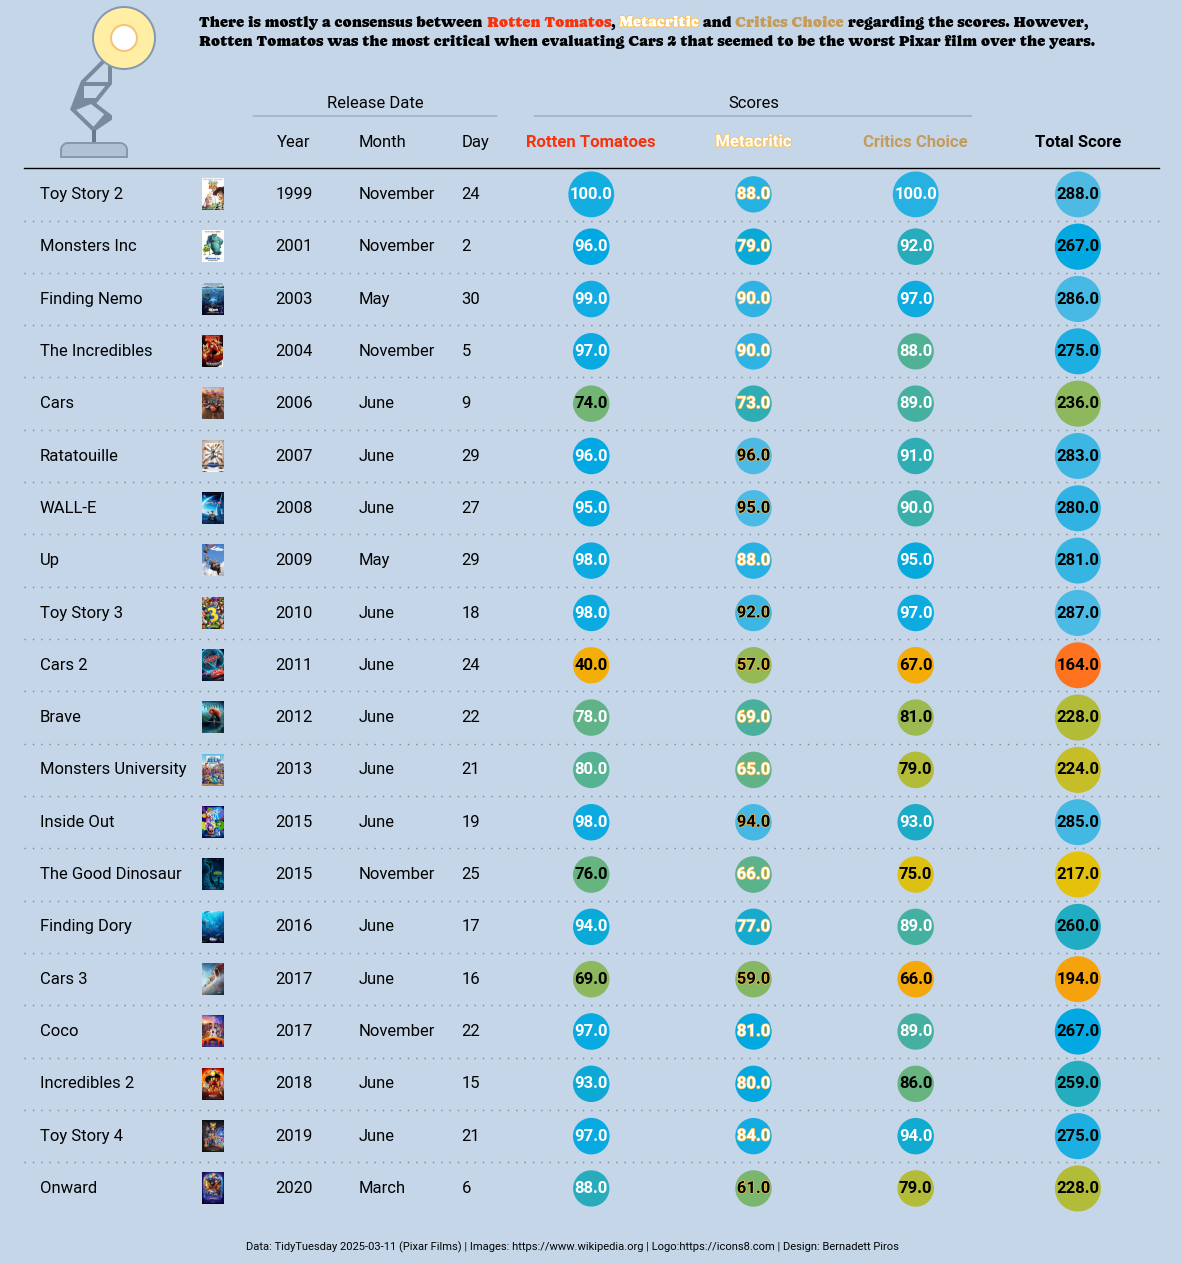

In [17]:
plt.rcParams["font.family"] = ["Roboto"]

fig, ax = plt.subplots(figsize=(15, 15))

bg_color = "#C4D6E8"
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

tab = Table(
    df,
    ax=ax,
    cell_kw={
        "linewidth": 0,
        "edgecolor": "#010101",
    },
    textprops={"fontsize": 12, "color": "#010101"},
    column_definitions=[
        ColumnDefinition(
            "film",
            title="",
            textprops={"ha": "left"},
            width=0.3),
        ColumnDefinition(
            "icon",
            title="",
            textprops={"ha": "center"},
            plot_fn=image,
            width=0.1),       
        ColumnDefinition(
            "year",
            title="Year",
            textprops={"ha": "center"},
            width=0.2,
            group="Release Date"),
        ColumnDefinition(
            "month",
            title="Month",
            textprops={"ha": "left"},
            width=0.2,
            group="Release Date"),
        ColumnDefinition(
            "day",
            title="Day",
            textprops={"ha":"left"},
            width=0.1,
            group="Release Date"),
        ColumnDefinition(
            "rotten_tomatoes",
            title="Rotten Tomatoes", 
            width=0.3,
            textprops={
                "ha": "center", "color": "#f93209", "weight":"bold",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
            },
            cmap=normed_cmap(df["rotten_tomatoes"], cmap=cmap, num_stds=6),  
            group="Scores"),
        ColumnDefinition(
            "metacritic",
            title="Metacritic",
            width=0.3,
            textprops={
                "ha": "center", "color":"white", "weight":"bold",
                "path_effects": my_path_effect, 
                "bbox": {"boxstyle": "circle", "pad": 0.05},
            },
            cmap=normed_cmap(df["metacritic"], cmap=cmap, num_stds=6),  
            group="Scores"),
        ColumnDefinition(
            "critics_choice",
            title="Critics Choice",
            width=0.3,
            textprops={
                "ha": "center", "color":"#c49b59", "weight":"bold",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
            },
            cmap=normed_cmap(df["rotten_tomatoes"], cmap=cmap, num_stds=3),
            group="Scores"),        
        ColumnDefinition(
            "total_score",
            title="Total Score",
            width=0.3,
            textprops={
                "ha": "center", "weight":"bold",
                "bbox": {"boxstyle": "circle", "pad": 0.05},
            },
            cmap=normed_cmap(df["total_score"], cmap=cmap, num_stds=3),
        ),
    ],
    row_divider_kw={"linewidth": 1,
                    "linestyle": (0, (1, 5)),
                    "color": "#7f888a",}
).autoset_fontcolors(colnames=["rotten_tomatoes", "metacritic", "critics_choice",])

fig_text(0.55, 0.9, "There is mostly a consensus between <Rotten Tomatos>, <Metacritic> and <Critics Choice> regarding the scores. However,\nRotten Tomatos was the most critical when evaluating Cars 2 that seemed to be the worst Pixar film over the years.",
         font=title_font, color="#010101", size=11, va="center", ha="center",
         highlight_textprops=[
             {"color": "#f93209"},
             {"color": "white", "path_effects": my_path_effect},
             {"color": "#c49b59"},             
             ])
            
fig.text(0.5, 0.09, "Data: TidyTuesday 2025-03-11 (Pixar Films) | Images: https://www.wikipedia.org | Logo:https://icons8.com | Design: Bernadett Piros",
         color="#010101", size=8, ha="center", va="center")

logo_path = "icons8-pixar-lamp-160.png"  
logo = Image.open(logo_path)
logo = np.array(logo)
xo = 30
yo = 1099

plt.figimage(logo, xo=xo, yo=yo, origin="upper")

#plt.show()

#fig.savefig("table_pixar.png", bbox_inches='tight', pad_inches=0.2, dpi=300)
fig.savefig("2025-03-11.png", bbox_inches='tight', pad_inches=0.2)